In [335]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve,f1_score,log_loss

# Import and prepare data

According to the given characteristics of the bio molecule, it is required to determine whether a biological response will be given ("Activity" - biological response or a signal transmission).

In [336]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [337]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [338]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [339]:
target = bioresponce.Activity.values

In [340]:
bioresponce.drop(['Activity'], axis=1, inplace=True)

In [341]:
x_train, x_test, y_train, y_test = train_test_split(bioresponce, target,  test_size=0.3, random_state=1)

# Train  classifiers

In [342]:
# classifiers: small/deep decision tree, random forest on small/deep trees
models = [DecisionTreeClassifier(random_state = 1, max_depth = 2), 
          DecisionTreeClassifier(random_state = 1, max_depth = 15),
          RandomForestClassifier(random_state = 1, max_depth = 2),
          RandomForestClassifier(random_state = 1, max_depth = 15),
         ]
models_name = ['Small decision tree', 'Deep decision tree', 'Random forest on small trees', 'Random forest on deep trees']

y_out_all_models = []
predict_probas = []
for model in models: 
    model = model.fit(x_train, y_train)
    y_out = model.predict(x_test)
    predict_pr = model.predict_proba(x_test)
    y_out_all_models.append(y_out)
    predict_probas.append(predict_pr)
    

# Metrics

In [343]:
metrics_result = []
for i in y_out_all_models: 
    accuracy = m.accuracy_score(y_test,i)
    precision = m.precision_score(y_test,i)
    recall = m.recall_score(y_test,i)
    log_loss = m.log_loss(y_test,i)
    f1_score = m.f1_score(y_test,i)
    confusion_matrix = metrics.confusion_matrix(y_test, i)
    metrics_result.append([accuracy,precision, recall, log_loss,f1_score, 
                           confusion_matrix[0][0], confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1]])
metrics_result = pd.DataFrame( metrics_result,columns = ['Accuracy', 'Precision','Recall','Log loss', 'F1-Score', 'TN','FP','FN','TP'], index = models_name)

In [344]:
metrics_result

,Accuracy,Precision,Recall,Log loss,F1-Score,TN,FP,FN,TP
Small decision tree,0.760213,0.748588,0.852090,8.282071,0.796992,326,178,92,530
Deep decision tree,0.730018,0.762376,0.742765,9.324958,0.752443,360,144,160,462
Random forest on small trees,0.690053,0.691983,0.790997,10.705336,0.738185,285,219,130,492
Random forest on deep trees,0.791297,0.817734,0.800643,7.208438,0.809098,393,111,124,498


# Precision-recall and ROC curves

In [345]:
curves = ['Precision-recall', 'ROC']
curves = {model : {curve : None for curve in curves} for model in models_name}

In [346]:
curves['Small decision tree']

{'Precision-recall': None, 'ROC': None}

In [347]:
for j,curve in enumerate (curves.keys()):
    curves[curve]['Precision-recall'] = precision_recall_curve(y_test, predict_probas[j][:,1])
    curves[curve]['ROC'] = roc_curve(y_test,  predict_probas[j][:,1])


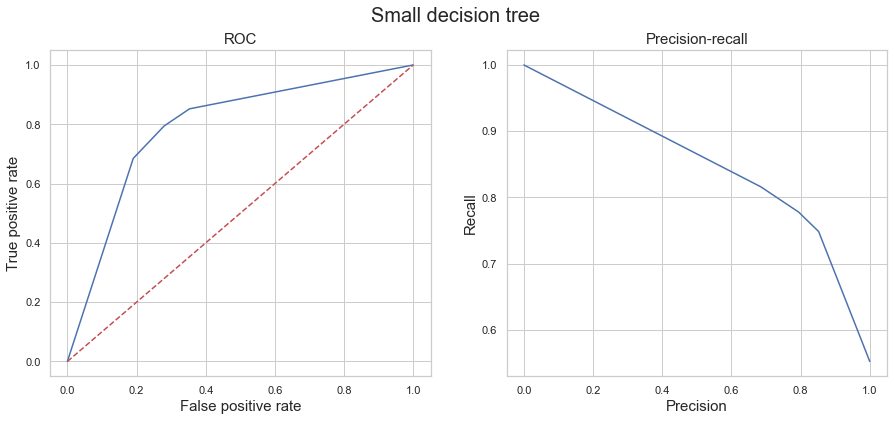

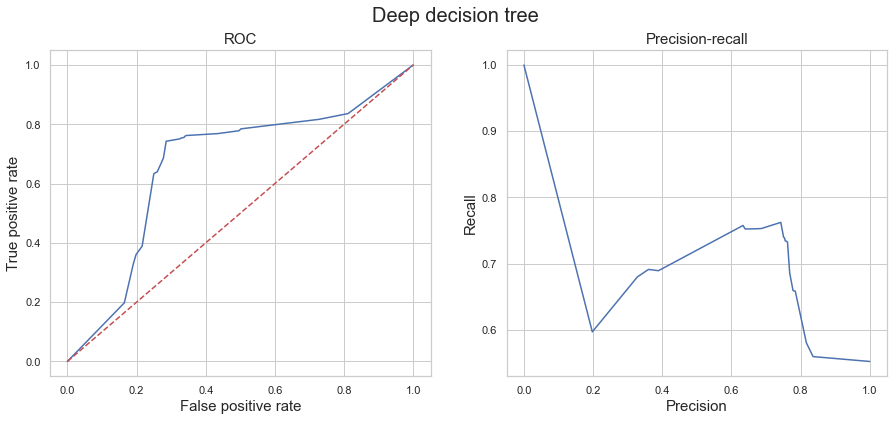

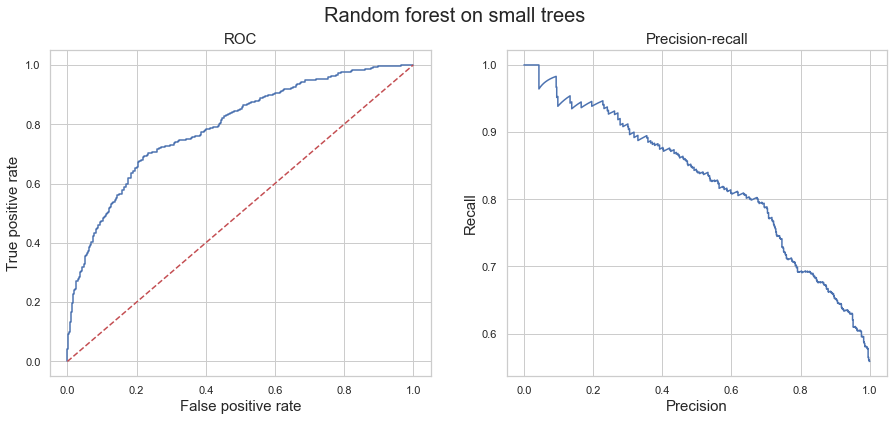

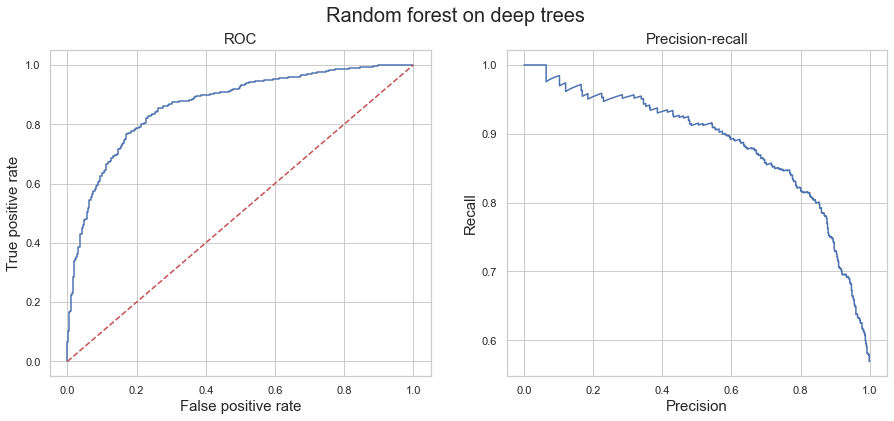

In [349]:
 for curve in curves.keys():
    figure, ax = plt.subplots(1, 2, figsize=(15, 6))
    figure.suptitle(curve, fontsize=20)
    sns.set_theme(style='whitegrid')
    axs = ax.ravel()
    pr_curve_roc= curves[curve]['ROC']
    pr_curve_recall = curves[curve]['Precision-recall']
    axs[0].plot(pr_curve_roc[0], pr_curve_roc[1])
    axs[0].plot(pr_curve_roc[1], pr_curve_roc[1], 'r--')
    axs[0].set_title('ROC', fontsize=15)
    axs[0].set_xlabel("False positive rate",fontsize = 15)
    axs[0].set_ylabel("True positive rate",fontsize = 15)
    axs[1].plot(pr_curve_recall[1], pr_curve_recall[0])
    axs[1].set_title('Precision-recall', fontsize=15)
    axs[1].set_xlabel("Precision",fontsize = 15)
    axs[1].set_ylabel("Recall",fontsize = 15)
    
  


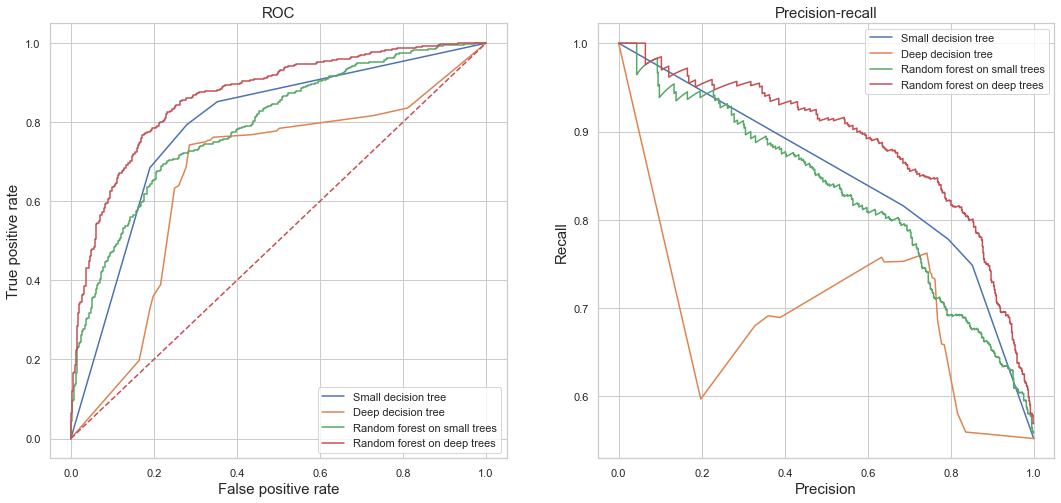

In [350]:

figure, ax = plt.subplots(1,2, figsize=(18,8))
sns.set_theme(style='whitegrid')
axs = ax.ravel()
for curve in curves.keys():
    pr_curve_roc= curves[curve]['ROC']
    pr_curve_recall = curves[curve]['Precision-recall']
    axs[0].plot(pr_curve_roc[0], pr_curve_roc[1])
    axs[0].set_title('ROC', fontsize=15)
    axs[0].set_xlabel("False positive rate",fontsize = 15)
    axs[0].set_ylabel("True positive rate",fontsize = 15)
    axs[1].plot(pr_curve_recall[1], pr_curve_recall[0])
    axs[1].set_title('Precision-recall', fontsize=15)
    axs[1].set_xlabel("Precision",fontsize = 15)
    axs[1].set_ylabel("Recall",fontsize = 15)
axs[1].legend(curves.keys())
axs[0].legend(curves.keys())
axs[0].plot(pr_curve_roc[1], pr_curve_roc[1], 'r--')

# Train a classifier avoiding Type II (False Negative) errors 

In [374]:
# classifiers: small/deep decision tree, random forest on small/deep trees
models_with_weight = [DecisionTreeClassifier(random_state = 1, max_depth = 2, class_weight={0 : 1. ,1 : 5.}), 
          DecisionTreeClassifier(random_state = 1, max_depth = 15,class_weight={0 : 0.5, 1 : 20.}),
          RandomForestClassifier(random_state = 1, max_depth = 2, class_weight={0 : 0.5, 1 : 5.}),
          RandomForestClassifier(random_state = 1, max_depth = 15, class_weight={0 : 0.5, 1 : 5.}),
         ]
models_name = ['Small decision tree', 'Deep decision tree', 'Random forest on small trees', 'Random forest on deep trees']

y_out_all_models_with_weight = []
predict_probas_with_weight = []
for model in models_with_weight: 
    model = model.fit(x_train, y_train)
    y_out = model.predict(x_test)
    predict_pr = model.predict_proba(x_test)
    y_out_all_models_with_weight.append(y_out)
    predict_probas_with_weight.append(predict_pr)
    
metrics_result_with_weight= []
for i in y_out_all_models_with_weight: 
    accuracy = m.accuracy_score(y_test,i)
    precision = m.precision_score(y_test,i)
    recall = m.recall_score(y_test,i)
    log_loss = m.log_loss(y_test,i)
    f1_score = m.f1_score(y_test,i)
    confusion_matrix = metrics.confusion_matrix(y_test, i)
    metrics_result_with_weight.append([accuracy,precision, recall, log_loss,f1_score, 
                           confusion_matrix[0][0], confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1]])
metrics_result_with_weight = pd.DataFrame( metrics_result_with_weight,columns = ['Accuracy', 'Precision','Recall','Log loss', 'F1-Score', 'TN','FP','FN','TP'], index = models_name)

In [375]:
metrics_result_with_weight

,Accuracy,Precision,Recall,Log loss,F1-Score,TN,FP,FN,TP
Small decision tree,0.551510,0.552372,0.991961,15.490659,0.709603,4,500,5,617
Deep decision tree,0.622558,0.600000,0.950161,13.036674,0.735532,110,394,31,591
Random forest on small trees,0.552398,0.552398,1.000000,15.459988,0.711670,0,504,0,622
Random forest on deep trees,0.666075,0.630851,0.953376,11.533621,0.759283,157,347,29,593
